In [2]:
import os
os.chdir('/Users/akshit.jain/repos/node2vec')

In [ ]:
! python3 src/main.py --input graph/karate.edgelist --output emb/karate.emd

In [26]:
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd


In [70]:
fname='./emb/mc_graph.emd'
wv = KeyedVectors.load_word2vec_format(fname)

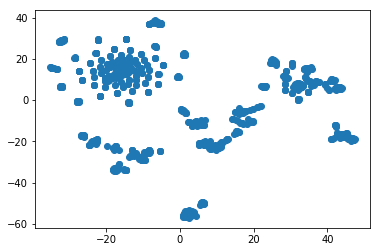

In [71]:
X = wv[wv.vocab]

tsne = TSNE(n_components=2,n_iter=1000)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [88]:
! mkdir tsne

In [103]:
import numpy as np
np.savetxt('tsne/embs.txt', X,fmt='%0.6e',delimiter='\t')

In [102]:
vocab.iloc[list(map(int,list(wv.vocab.keys())))]['tok'].to_csv('tsne/vocab.txt', header=False, index=False)

# embed microsoft concept graph

In [32]:
df=pd.read_csv('/Users/akshit.jain/Downloads/microsoft_concept_graph/data-concept/data-concept-instance-relations.txt', sep='\t', names=['obj','sub', 'rel'], nrows=1000)
df.head()

,obj,sub,rel
0,factor,age,35167
1,free rich company datum,size,33222
2,free rich company datum,revenue,33185
3,state,california,18062
4,supplement,msm glucosamine sulfate,15942


In [37]:
import re
for col in ['sub', 'obj']:
    df[col]=df[col].apply(lambda x: re.sub('\ +', '_',x))

In [40]:
df[['sub','obj']].to_csv('./graph/mc_graph.edges',sep=' ', header=False, index=False)

In [41]:
import networkx as nx
nx.read_edgelist()

AttributeError: module 'networkx' has no attribute 'rea'

In [57]:
vocab=pd.Series(df['obj'].append(df['sub']).unique()).to_frame(name='tok')
vocab['id']=vocab.index
# vocab=list(frozenset(df['obj'].unique()) | frozenset(df['sub']))
# w2i=dict([(word, idx) for idx, word in enumerate(vocab)])
# i2w=dict(enumerate(vocab))

In [65]:
# df.apply(lambda x: w2i[k]axis=1)
id_df=pd.merge(df, vocab, how='inner', left_on='sub', right_on='tok').rename(columns={'id':'sid'})
id_df=pd.merge(id_df, vocab, how='inner', left_on='obj', right_on='tok').rename(columns={'id':'oid'})
id_df=id_df[['obj','sub', 'oid','sid']]

In [67]:
id_df.head()

,obj,sub,oid,sid
0,factor,age,0,270
1,factor,size,0,271
2,factor,gender,0,275
3,factor,temperature,0,276
4,factor,diabetes,0,295


In [69]:
id_df[['oid','sid']].to_csv('./graph/mc_graph.edges',sep=' ', header=False, index=False)